A .dcm dose cube was exported from Eclipse. This was viewed in imageJ and a single slice exported as both png and text (file > save as > text image). Now apply analysis to compare two nearby slices. Note when comparing plans with AAA/AXB, array sizes and spacings will differ slightly so this code will require changes.

png images are scaled to 0 - 1 on export so lose information for comparing images. Likewwise text images are scaled from 0 - 255

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [19]:
slice80=mpimg.imread('Case_30_Dm_dose_slice80.png')  # png images automatically scaled to 0 - 1 by imageJ?
slice82=mpimg.imread('Case_30_Dm_dose_slice82.png')

p_min = max(slice80.min(), slice82.min())    # get range for image plotting
p_max = max(slice80.max(), slice82.max())

#clim=(p_min, p_max)

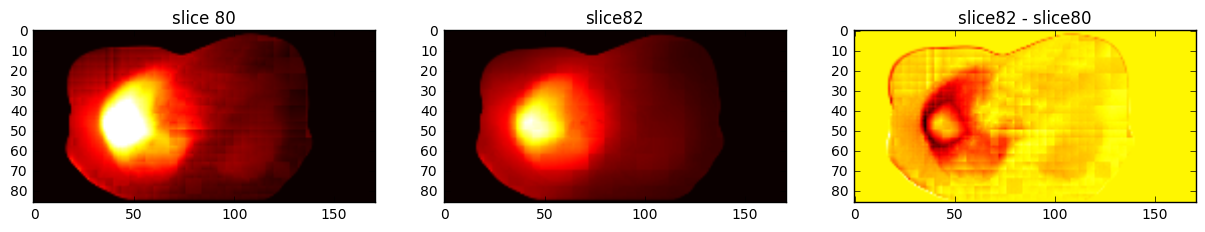

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

ax1.imshow(slice80, clim=(p_min, p_max),cmap="hot")
ax1.set_title('slice 80')

ax2.imshow(slice82, clim=(p_min, p_max),cmap="hot")
ax2.set_title('slice82')

ax3.imshow(slice82-slice80, cmap="hot")
ax3.set_title('slice82 - slice80')


plt.show()

#plt.savefig('Both slices.png')

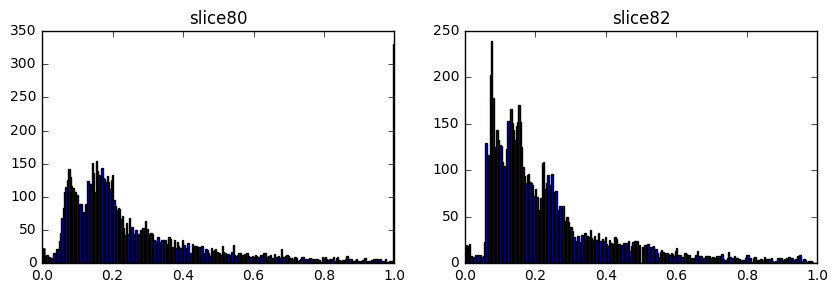

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax1.hist(slice80[slice80>0].ravel(), bins=256); # range=(0.0, 1.0),  # PLOT ONLY VALUES GREATER THAN BACKGROUND OF ZERO
ax1.set_title("slice80")

ax2.hist(slice82[slice82>0].ravel(), bins=256); # range=(0.0, 1.0),  # PLOT ONLY VALUES GREATER THAN BACKGROUND OF ZERO
plt.title('Histogram slice 82')
ax2.set_title("slice82")

plt.show()

# Load text image from imageJ

In [25]:
slice80_txt = np.genfromtxt('Case_30_Dm_dose_slice80.txt')
print(slice80_txt.max())
slice82_txt = np.genfromtxt('Case_30_Dm_dose_slice82.txt')
print(slice82_txt.max())

255.0
255.0


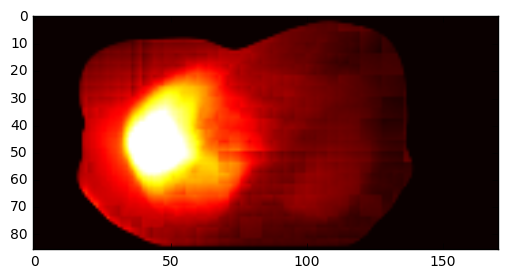

In [16]:
plt.imshow(slice80_txt, cmap="hot")

# Not used

In [27]:
# For a single hist
n, bins, patches = plt.hist(slice82[slice82>0].ravel(), bins=256); # range=(0.0, 1.0),  # PLOT ONLY VALUES GREATER THAN BACKGROUND OF ZERO

plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Histogram slice 82')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

#plt.show()